In [1]:
from tensorflow.keras.datasets import mnist

import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd


<h1 style="text-align: center; font-size: 64px">Neural Network form scratch</h1>

<h1 style="text-align: center; font-size: 48px">Abstract</h1>

<p>In this project, we will make a <b>neural network from scratch</b>. For the data we will use the <b>Mnist Dataset</b>. As for the <em>architecture of the neural network</em>, initially we will use only <b>one hidden layer with 128 neurons</b>. At least the first part of the project will be done with the <b>Tensorflow API</b>.</p>

# 01. Mnist Dataset

In [2]:
(attributes_train, labels_train), (attributes_test, labels_test) = mnist.load_data()

In [3]:
attributes_train.shape

(60000, 28, 28)

In [4]:
attributes_test.shape

(10000, 28, 28)

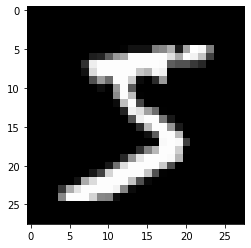

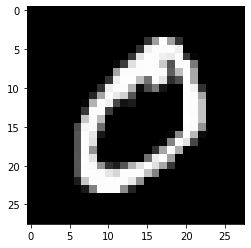

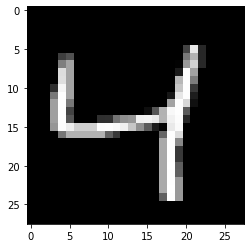

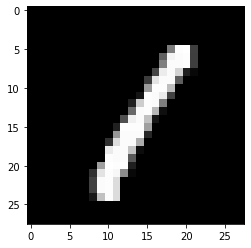

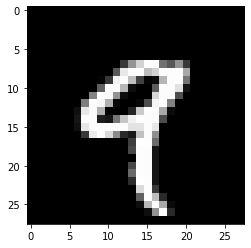

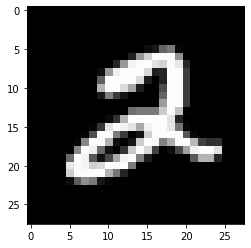

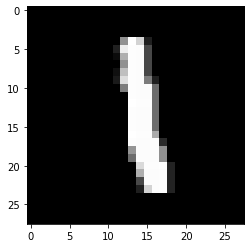

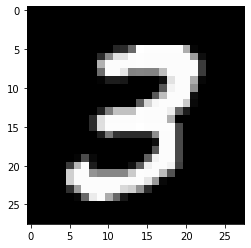

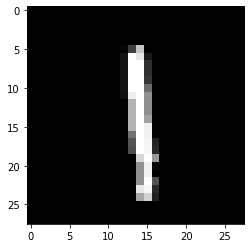

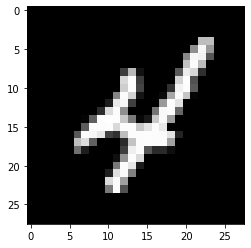

In [5]:
for i in range(10):
    plt.imshow(attributes_train[i], cmap='gray')
    plt.show()
    

# 02. Normalization

As we already know, the neural networks are very sensitive to the data, so we will scale ours to have values between 0 and 1.

In [6]:
attributes_train = attributes_train / 255.0
attributes_test = attributes_test / 255.0

# 03. Distribution of labels

To make sure that the distribution of labels will not cause problems later in the process, we will check it.

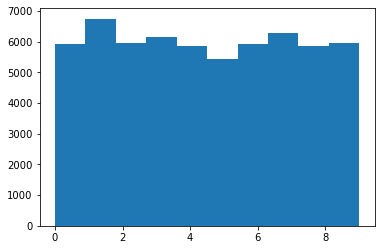

In [7]:
plt.hist(labels_train)
plt.show()

# 04. Flattening the images

For easier work, we will flatten the images.

In [8]:
def flatten(data):
    result = tf.convert_to_tensor(np.array([sample.ravel() for sample in data]), dtype=tf.float32)
    return result

In [9]:
x = flatten(attributes_train)

# 05. Weight initialization

The following function is very important. There are many ways to initialize the weights, but we will use the Glorot (Xavier) initialization. The parameter a will be the size of the input by which the weights will be multiplied and the parameter b will be the number of neurons in the next layer. The parameter size is the used to define the shape of the weights.

In [10]:
@tf.function
def glorot_weights_initializer(a, b, size):
    std = tf.sqrt(tf.divide(tf.constant(2), tf.add(tf.constant(a), tf.constant(b))))
    w = tf.random.normal(shape = (size, 1), mean = 0, stddev = tf.cast(std, tf.float32), seed = 42)
    return w

In [11]:
weight = glorot_weights_initializer(784, 128, 784)

In [12]:
weight

<tf.Tensor: shape=(784, 1), dtype=float32, numpy=
array([[-1.31484978e-02],
       [-6.45083375e-03],
       [-3.16720344e-02],
       [ 1.15108327e-03],
       [-4.18459326e-02],
       [-3.87968197e-02],
       [ 5.65180071e-02],
       [ 6.46719858e-02],
       [-6.81739748e-02],
       [-1.15300212e-02],
       [-6.37272000e-02],
       [ 5.09484112e-02],
       [-1.64448489e-02],
       [-2.40633897e-02],
       [ 1.59768462e-01],
       [ 2.75612995e-03],
       [ 4.17624712e-02],
       [-3.52569893e-02],
       [-2.03039069e-02],
       [ 1.14912204e-01],
       [ 1.46924192e-02],
       [-2.46959906e-02],
       [ 3.99219356e-02],
       [-2.51900963e-02],
       [ 4.92286496e-02],
       [ 4.26194211e-03],
       [ 1.90974912e-03],
       [ 4.14924547e-02],
       [-3.08971927e-02],
       [ 1.26521334e-01],
       [ 4.41734679e-02],
       [ 6.62854593e-03],
       [-3.21478732e-02],
       [ 2.90785357e-02],
       [ 7.66896456e-02],
       [-1.09546063e-02],
       [ 5.594

(array([ 2.,  5.,  8., 22., 48., 72., 71., 83., 89., 96., 74., 78., 47.,
        40., 16., 15.,  7.,  7.,  3.,  1.]),
 array([-0.1282657 , -0.11386399, -0.09946228, -0.08506057, -0.07065886,
        -0.05625715, -0.04185545, -0.02745374, -0.01305203,  0.00134968,
         0.01575138,  0.03015309,  0.0445548 ,  0.05895651,  0.07335822,
         0.08775993,  0.10216163,  0.11656334,  0.13096505,  0.14536676,
         0.15976846], dtype=float32),
 <BarContainer object of 20 artists>)

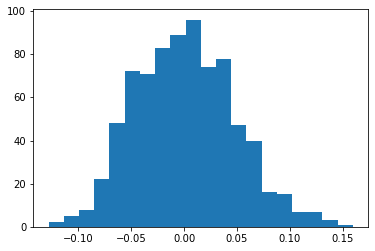

In [13]:
plt.hist(weight.numpy().ravel(), bins='fd')

# 06. Bias initialization

The function for bias initialization has only one parameter - the size of the output layer.

In [15]:
@tf.function
def bias_initializer(layer_size):
    b = tf.ones(shape = (layer_size, ))
    return b

In [16]:
bias = bias_initializer(128)

In [17]:
bias

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

# 07. Activation (ReLU)

As activation function of our project, we will use the original ReLU.

$$ ReLU = max(0, x) $$

In [18]:
@tf.function
def relu(x):
    return tf.maximum(tf.constant(0.0), x)

# 08. Creating the neural network

For now, we will use only one hidden layer with 64 neurons.

## One-hot encoding labels

For the cost function that we will use, we will make the labels one-hot encoded.

In [19]:
y = tf.one_hot(labels_train, depth=10)

## Cost function

Our cost function will be the standart cross-entropy cost function.

$$ C = -\frac{1}{n}\sum{y * \log{(\tilde{y})} +  (1 - y) * \log{(1 - \tilde{y})}}$$

In [20]:
weights_1 = tf.Variable(tf.concat([glorot_weights_initializer(784, 128, 784) for i in range(64)], 1))
bias_1 = tf.Variable(bias_initializer(64))
weights_2 = tf.Variable(tf.concat([glorot_weights_initializer(128, 10, 64) for i in range(10)], 1))
bias_2 = tf.Variable(bias_initializer(10))


We will keep track of the cost function in order to plot the learning curve later on.

In [22]:
loss = []

In [23]:
for i in range(200):
    with tf.GradientTape(persistent=True) as tape:
        dot_bias_1 = tf.add(tf.matmul(x, weights_1), bias_1)
        activation_1 = relu(dot_bias_1)
        dot_bias_2 = tf.add(tf.matmul(activation_1, weights_2), bias_2)
        predictions = tf.nn.softmax(dot_bias_2)
        cost = tf.divide(-tf.math.reduce_sum(tf.add(tf.multiply(y, tf.math.log(predictions)), tf.multiply(tf.subtract(tf.constant(1.0), y), tf.math.log(tf.subtract(tf.constant(1.0), predictions))))), 60000)
        
    dw_1 = tape.gradient(cost, weights_1)
    dw_2 = tape.gradient(cost, weights_2)
    db_1 = tape.gradient(cost, bias_1)
    db_2 = tape.gradient(cost, bias_2)
    
    print(cost.numpy())
    
    loss.append(cost.numpy())
    
    weights_1 = tf.Variable(tf.subtract(weights_1, tf.multiply(dw_1, tf.constant(0.1))))
    weights_2 = tf.Variable(tf.subtract(weights_2, tf.multiply(dw_2, tf.constant(0.1))))
    bias_1 = tf.Variable(tf.subtract(bias_1, tf.multiply(db_1, tf.constant(0.1))))
    bias_2 = tf.Variable(tf.subtract(bias_2, tf.multiply(db_2, tf.constant(0.1))))

3.6553917
3.2387354
3.0402
2.9031386
2.782673
2.6676705
2.557498
2.4523807
2.3525739
2.258251
2.169474
2.0862117
2.0083344
1.9356588
1.8679273
1.8048682
1.7461803
1.6915501
1.6406721
1.593259
1.5490313
1.5077337
1.4691188
1.4329646
1.3990743
1.3672591
1.3373492
1.3091962
1.2826627
1.2576249
1.2339677
1.2115903
1.1903976
1.1703066
1.1512388
1.1331226
1.1158925
1.0994883
1.0838541
1.0689398
1.0546994
1.0410904
1.028073
1.0156105
1.0036702
0.99221975
0.9812312
0.97067934
0.96053773
0.95078474
0.9413998
0.93236184
0.9236511
0.9152513
0.9071465
0.8993222
0.89176357
0.8844574
0.8773914
0.8705548
0.8639366
0.85752654
0.85131556
0.8452942
0.8394537
0.8337857
0.8282835
0.8229402
0.81774837
0.8127019
0.80779475
0.80302125
0.7983754
0.793853
0.7894483
0.78515667
0.78097385
0.7768953
0.77291787
0.76903784
0.76525164
0.7615551
0.7579452
0.7544193
0.7509742
0.74760705
0.7443149
0.7410959
0.73794776
0.73486805
0.731854
0.72890365
0.7260147
0.7231848
0.72041273
0.717696
0.71503276
0.712422
0.7098617
0

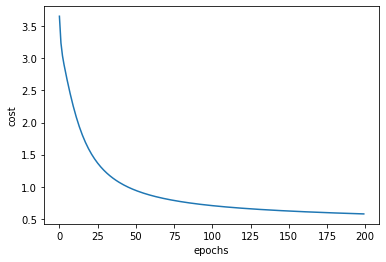

In [24]:
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.show()

We trained the neural net, now let's see what accuracy it can achieve on the test data

In [26]:
test = flatten(attributes_test)

In [27]:
labels_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [28]:
dot_bias_test_1 = tf.add(tf.matmul(test, weights_1), bias_1)
activation_test = relu(dot_bias_test_1)
dot_bias_test_2 = tf.add(tf.matmul(activation_test, weights_2), bias_2)
predictions_test = tf.nn.softmax(dot_bias_test_2)

In [29]:
s = 0

for i in range(len(predictions_test)):
    if tf.argmax(predictions_test[i]).numpy() == labels_test[i]:
        s += 1

In [30]:
s / 10000

0.9073

Our model achieves 90.73% accuracy on the test data, which is OK, based on the fact that it has only one hidden layer.

# #ToDO:

1. investigate where the model makes mistakes
2. make neural net with more hidden layers and test it
3. make Adam optimizer for the training process
4. make Dropout and BatchNorm functions